# **3 포트폴리오의 기대수익률과 위험**

## **1	두 개의 주식으로 구성된 포트폴리오**
- 포트폴리오 비중 (Weight )의 합은 1 이다

### **01 포트폴리오 기대수익률 Python 기본문법 계산**
- 종목을 분산시킨 경우 기대수익률의 계산은 다음과 같다
$$ r_{p} = w_{a}r_{a} + w_{b}r_{b} $$

In [1]:
# 경기국면별 확률과 주식의 기대수익률
stock_a = [ 0.07, 0.04, 0.01 ]
stock_b = [ 0.13, 0.04, -0.05 ]
prob = [ 1/3, 1/3, 1/3 ]

ex_a = 0.0
ex_b = 0.0
wgt_a = 0.5
wgt_b = 0.5

ex_a = sum(s*p for s, p in zip(stock_a, prob)) 
ex_b = sum(s*p for s, p in zip(stock_b, prob))   
ex_p = wgt_a * ex_a + wgt_b * ex_b
print(f'기대수익률 (주식A) {ex_a:.2%}\n기대수익률 (주식B) {ex_b:.2%}\n포트폴리오 기대수익률 {ex_p:.2%}')

기대수익률 (주식A) 4.00%
기대수익률 (주식B) 4.00%
포트폴리오 기대수익률 4.00%


In [2]:
# 행렬연산을 활용한 포트폴리오 기대수익률
var_a = 0.0
var_b = 0.0
var_a = sum(p*(s-ex_b)**2 for s,p in zip(stock_a, prob))  
var_b = sum(p*(s-ex_b)**2 for s,p in zip(stock_b, prob))
print(f'주식A의 분산 {var_a:.2%}\n주식B의 분산 {var_b:.2%}')

cov = sum(p*(a-ex_a)*(b-ex_b) for a,b,p in zip(stock_a,stock_b,prob))
var_p = wgt_a**2 * var_a + wgt_b**2 * var_b + 2*wgt_a*wgt_b*cov
print(f'포트폴리오의 분산 {var_p:.2%}')

주식A의 분산 0.06%
주식B의 분산 0.54%
포트폴리오의 분산 0.24%


### **02 포트폴리오 기대수익률 Numpy 계산**

In [3]:
# Numpy 를 활용한 포트폴리오 연산
import numpy as np
stock_a = np.matrix([ [7, 4, 1] ])
stock_b = np.matrix([ [13, 4, -5] ])
prob = np.matrix([ [1/3, 1/3, 1/3] ])

ex_a = prob * stock_a.T
ex_b = prob * stock_b.T
print('주식A의 기대수익율은 %.2f%%' % ex_a)
print('주식B의 기대수익율은 %.2f%%' % ex_b)

weight = np.matrix([[0.5, 0.5]])
ex_ab = np.matrix([
    [ ex_a.item() , ex_b.item() ]
])  # .item() : Numpy 의 데이터를 Python 객체로 변환
ex_p  = weight * ex_ab.T
f'포트폴리오의 기대수익율은 {ex_p.item():.2f}%'

주식A의 기대수익율은 4.00%
주식B의 기대수익율은 4.00%


'포트폴리오의 기대수익율은 4.00%'

In [4]:
# Numpy 를 활용한 행렬연산
import numpy as np
stock_a = np.matrix( [ 
    [7], [4], [1] 
] )
stock_b = np.matrix( [ 
    [13], [ 4], [-5] 
] )
prob = np.matrix( [ [1/3, 1/3, 1/3] ] )
ex_a = prob * stock_a
ex_b = prob * stock_b
print('주식A의 기대수익율은 %.2f%%' % ex_a)
print('주식B의 기대수익율은 %.2f%%' % ex_b)

weight = np.matrix([[0.5, 0.5]])
ex_ab = np.matrix([
    [ ex_a.item() ],
    [ ex_b.item() ],
])
ex_p  = weight * ex_ab
print('포트폴리오의 기대수익율은 %.2f%%' % ex_p)

주식A의 기대수익율은 4.00%
주식B의 기대수익율은 4.00%
포트폴리오의 기대수익율은 4.00%


### **03 포트폴리오 위험의 계산**

In [5]:
import math
stock_a = [ 0.07, 0.04, 0.01 ]
stock_b = [ 0.13, 0.04, -0.05 ]
prob = [ 1/3, 1/3, 1/3 ]
ex_a = 0.0
ex_b = 0.0
ex_a = sum(ex_a + s*p   for s, p in zip(stock_a, prob))
ex_b = sum(ex_b + s*p   for s, p in zip(stock_b, prob))

In [6]:
var_a = 0.0
var_b = 0.0
wgt_a = 0.5
wgt_b = 0.5
for s, p in zip(stock_a, prob):
    var_a = var_a + p*(s-ex_a)**2    
for s, p in zip(stock_b, prob):
    var_b = var_b + p*(s-ex_b)**2
print('주식A의 분산은 {:.2%}'.format(var_a))
print('주식B의 분산은 {:.2%}'.format(var_b))

cov = sum(p*(a-ex_a)*(b-ex_b) for a, b, p in zip(stock_a, stock_b, prob))
var_p = wgt_a**2 * var_a + wgt_b**2 * var_b + 2*wgt_a*wgt_b*cov
std_p = math.sqrt(var_p)
print('포트폴리오의 분산은 {:.2%}'.format(var_p))
print('포트폴리오의 표준편차는 {:.2%}'.format(std_p))

주식A의 분산은 0.06%
주식B의 분산은 0.54%
포트폴리오의 분산은 0.24%
포트폴리오의 표준편차는 4.90%


## **2 N개 주식으로 만든 포트폴리오**
- n개의 종목으로 구성된 포트폴리오의 수익률
$$ r_{p} = w_{1}r_{1} + w_{2}r_{2} + ... + w_{n}r_{n} $$
- n개의 자산으로 구성된 포트폴리오 기대수익률
$$ E\big(r_{p}\big) = w_{1}E\big(r_{1}\big) + w_{2}E\big(r_{2}\big) + ... + w_{n}E\big(r_{n}\big) $$

### **01 포트폴리오 생성 및 계산**

In [7]:
# 난수로 포트폴리오 생성
import numpy as np
np.random.rand(10, 2)
np.random.randn(3, 10)

array([[-1.07067653, -0.41837135,  0.18190806,  0.60956003,  1.1877923 ,
         1.36270152, -0.74848813, -1.46327491,  0.86812325,  1.1871358 ],
       [-0.34170184, -0.53993839, -1.39193195, -0.73396453, -0.62615459,
        -1.00940335,  0.21668791, -0.62957714, -1.05300962,  0.60981875],
       [-0.14142372,  0.85312455,  0.35178068,  0.63414473, -0.80547003,
        -0.53040145, -0.02241091,  1.22110378,  1.07611776,  0.45504621]])

In [8]:
# 생성한 수익률과 투자비중으로 포트폴리오 수익률 계산
import numpy as np
numStocks = 3 # 자산의 갯수
# 세 가지 자산의 갯수만큼 주식의 수익률을 난수로 생성
returns = np.random.randn(3, numStocks)
print('1. 난수로 만드는 국면별 주식의 수익률: \n', returns)

1. 난수로 만드는 국면별 주식의 수익률: 
 [[-0.20135376  0.12017539 -1.22041424]
 [-0.40120763 -0.60247586  0.66949006]
 [-0.74584631  1.48510061 -1.47814253]]


In [9]:
prob = np.random.rand(3) # (세 가지 경기국면 확률)
prob /= prob.sum()       # 전체 합이 1.0
print('2. 경기국면별 각 확률: \n', prob)

2. 경기국면별 각 확률: 
 [0.23409022 0.36032957 0.4055802 ]


In [10]:
# 경기국면별 확률과 수익률을 행렬곱
# prob.T는 prob 전치행렬 :  두 행렬의 곱은 np.matmul() 사용
# expectedReturns = prob.T * returns
expectedReturns = np.matmul(prob.T, returns)
print('3. 각 주식의 기대수익률: \n', expectedReturns)

3. 각 주식의 기대수익률: 
 [-0.49420242  0.41336942 -0.64395532]


In [11]:
# 자산의 투자비중을 만든다.  n개의 난수를 만든 후 이를 난수의 합으로 
# 다시 나누어 전체투자비중의 합(100%)이 1.0이 되도록 한다.
weights = np.random.rand(numStocks)
weights /= weights.sum()
print('4. 투자비중*기대수익률: \n', weights)

4. 투자비중*기대수익률: 
 [0.33641233 0.44546379 0.21812388]


In [12]:
# 포트폴리오의 기대수익률을 계산한다
portReturnsExpected = np.sum(weights*expectedReturns)
print('5. 포트폴리오의 기대수익률: {:.2%}'.format(portReturnsExpected))

5. 포트폴리오의 기대수익률: -12.26%


## **3 미국 주식데이터를 활용하여 포트폴리어 재구성**
### **01 주가 데이터 불러오기**
- **[FinanceDataReader](https://github.com/FinanceData/FinanceDataReader)** | **[yfinance](https://github.com/ranaroussi/yfinance)**

In [13]:
import yfinance as yf
tickers = ['MMM', 'ADBE', 'AMD', 'GOOGL', 'GOOG', 'AMZN']
adjClose = yf.download(" ".join(tickers).lower(), start='2018-01-01')['Adj Close']
adjClose.head(3)

[*********************100%***********************]  6 of 6 completed


,ADBE,AMD,AMZN,GOOG,GOOGL,MMM
Date,,,,,,
2018-01-02,177.699997,10.98,1189.010010,1065.000000,1073.209961,210.795288
2018-01-03,181.039993,11.55,1204.199951,1082.479980,1091.520020,210.786346
2018-01-04,183.220001,12.12,1209.589966,1086.400024,1095.760010,213.541611


In [14]:
# 일간 수정주가 데이터를 일간 수익률로 변환한다
dailySimpleReturns = adjClose.pct_change()
dailySimpleReturns.head(3)

,ADBE,AMD,AMZN,GOOG,GOOGL,MMM
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.018796,0.051913,0.012775,0.016413,0.017061,-0.000042
2018-01-04,0.012042,0.049351,0.004476,0.003621,0.003884,0.013071


In [15]:
import random
import numpy as np
import pandas as pd
# 일간 수익률로 평균을 계산한다. (250 trading days in a year)
meanReturns = np.matrix(dailySimpleReturns.mean())
annualReturns = dailySimpleReturns.mean() * 250
numAssets = len(tickers) # 주식의 갯수만큼 투자 비중을 생성한다
weights = np.random.random(numAssets) # 투자비중을 난수로 생성한 뒤 합이 1.0 
weights = weights / sum(weights)
numAssets, weights, sum(weights)      # check if the sum of weights is indeed = 1

(6,
 array([0.04812941, 0.45257255, 0.07160167, 0.27574549, 0.15147443,
        0.00047645]),
 1.0000000000000002)

In [16]:
# 투자비중과 연간 환산수익률을 곱해서 포트폴리오 기대수익률을 계산
portReturnsExpected = np.sum(weights * meanReturns.T)
portReturnsExpected

0.002148406681252522

### **02 미국 주식데이터 활용하여 n개 주식 포트폴리어의 위험**

In [17]:
import random
import numpy as np
import pandas as pd
import yfinance as yf

tickers = ['MMM', 'ADBE', 'AMD', 'GOOGL', 'GOOG', 'AMZN']
adjClose = yf.download(" ".join(tickers).lower(), start='2018-01-01')['Adj Close']
dailySimpleReturns = adjClose.pct_change()
print('dailySimpleReturns의 데이터형: ',type(dailySimpleReturns))
print('dailySimpleReturns.cov() 결과의 데이터형: ',type(dailySimpleReturns.cov()))

[*********************100%***********************]  6 of 6 completed
dailySimpleReturns의 데이터형:  <class 'pandas.core.frame.DataFrame'>
dailySimpleReturns.cov() 결과의 데이터형:  <class 'pandas.core.frame.DataFrame'>


In [18]:
# 행렬연산을 위하여 weights를 matirx 변환
weights = np.matrix(weights)
# 행렬연산을 위하여 cov()함수로 공분산한 결과를 
# 바로 values함수를 사용하여 행렬로 변환한다
pcov = dailySimpleReturns.cov().values
# 행렬연산으로 분산을 계산한다
# :: [종목비중 * 공분산 행렬 * 비중의 전치행렬 ]
varp = weights*pcov*weights.T 
print('포트폴리오 분산은 ', varp)

포트폴리오 분산은  [[0.00052725]]


## **4 국내 주식데이터를 활용하여 포트폴리어 재구성**
### **01 주가 데이터 불러오기**
- **[FinanceDataReader](https://github.com/FinanceData/FinanceDataReader)** | **[pyKRX](https://github.com/sharebook-kr/pykrx)**

In [19]:
from datetime import datetime
import FinanceDataReader as fdr
df = fdr.DataReader('005930', '2018-08-01', '2018-08-30')
df.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-08-01,46050,46850,46050,46550,7484499,0.006486
2018-08-02,46550,46800,45500,45550,8560924,-0.021482
2018-08-03,45850,45900,45450,45750,8274944,0.004391


<AxesSubplot:xlabel='Date'>

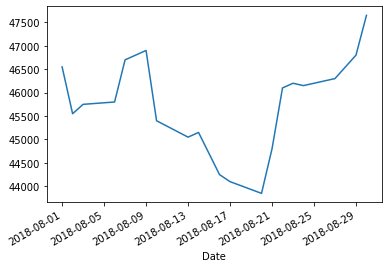

In [20]:
%matplotlib inline
df['Close'].plot()

## **5 최적의 포트폴리오**
| 구분   | 포트폴리오P | 주식 A  | 주식 B |
|:------:|:--------:|:-------:|:-----:|
|기대수익률|4%        | 4%      | 4%     |
|분산     |0.24%    | 0.06%   | 0.54%  |
|표준편차  |4.90%    | 2.45%   | 7.35%  |

### **01 포트폴리오 시뮬레이션**

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf

tickers    = ['AAPL', 'F', 'AMZN', 'GE', 'TSLA']
pxclose    = yf.download(" ".join(tickers).lower(), start='2019-01-01', end="2019-12-31")['Adj Close']
ret_daily  = pxclose.pct_change().iloc[1:,:] # 종가 수익률 계산한다
ret_annual = ret_daily.mean() * 250          # 일간 수익률 기준으로 연간 수익률 환산
cov_daily  = ret_daily.cov()                 
cov_annual = cov_daily * 250                 # 일간 공분산 기준으로 연간 공분산 환산
cov_annual

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,F,GE,TSLA
AAPL,0.068029,0.035134,0.021581,0.032007,0.042365
AMZN,0.035134,0.052277,0.023224,0.032044,0.030999
F,0.021581,0.023224,0.074582,0.041622,0.014125
GE,0.032007,0.032044,0.041622,0.165278,0.042742
TSLA,0.042365,0.030999,0.014125,0.042742,0.242226


In [22]:
p_returns = []
p_volatility = []
p_weights = []
n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt)
    ret = np.dot(wgt, ret_annual)
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
    p_returns.append(ret)
    p_volatility.append(vol)
    p_weights.append(wgt)

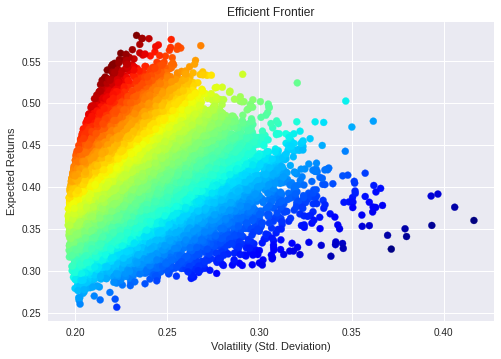

In [23]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

### **02 포트폴리오 시뮬레이션**

In [24]:
def obj_variance(weights, cov):
    return np.sqrt(weights.T @ covmat @ weights)

covmat = cov_daily * 250
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 

from scipy.optimize import minimize
res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)
res

     fun: 0.19590275349462652
     jac: array([0.19563652, 0.19580528, 0.19621079, 0.19581822, 0.19602492])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.21391393, 0.41412208, 0.30348134, 0.02192059, 0.04656206])

In [25]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt)
    ret = np.dot(wgt, ret_annual)
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
    p_returns.append(ret)
    p_volatility.append(vol)
    p_weights.append(wgt)

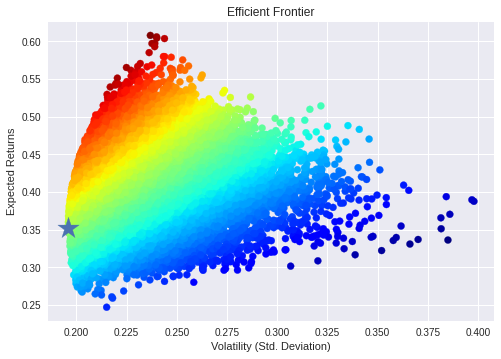

In [26]:
rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

### **03 Sharpe Ratio 최적 포트폴리오 시뮬레이션**

In [27]:
def obj_sharpe(weights, returns, covmat, rf):
    ret = np.dot(weights, returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(covmat, weights)))
    return 1/((ret-rf)/np.sqrt(vol))

n_assets = len(tickers)
covmat = cov_daily*250
rf = 0.01
weights = np.ones([n_assets])/n_assets
bnds = tuple((0., 1.) for i in range(n_assets))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 

from scipy.optimize import minimize
res = minimize(obj_sharpe, weights,(ret_annual, covmat, rf), method='SLSQP', bounds=bnds, constraints=cons)
res

     fun: 0.783658607602732
     jac: array([-0.40392893, -0.07397428, -0.2213303 , -0.40366399, -0.16190684])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([9.77513389e-01, 0.00000000e+00, 7.63278329e-17, 2.24866112e-02,
       1.90819582e-17])

In [28]:
p_returns = []
p_volatility = []
p_weights = []
n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt)
    ret = np.dot(wgt, ret_annual)
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
    p_returns.append(ret)
    p_volatility.append(vol)
    p_weights.append(wgt)

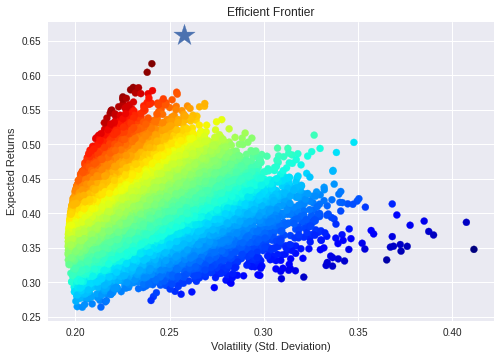

In [29]:
rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()